In [1]:
from data.dataset import Dataset, DatasetNames

dataset = Dataset()

dataset_name = DatasetNames.ARITHMETIC

dataset_path = dataset.generate(dataset_name)

train_data, val_data, vocabulary_size = dataset.get(dataset_name)

In [6]:
import torch
from models.gpt.gpt_model import GPT
from training.train_model import train_model

n_embeddings = 384
n_heads = 6
n_layers = 6
max_iterations = 10000
iterations_interval = 100
eval_iterations = 200
batch_size = 64
learning_rate = 3e-4
context_length = 10
dropout = 0.2

device = "cuda" if torch.cuda.is_available() else "cpu"

gpt_model = GPT(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout).to(device)

train_losses, val_losses, steps = train_model(gpt_model, max_iterations, iterations_interval, eval_iterations, batch_size, learning_rate, context_length, train_data, val_data, device)

step 0: train loss 3.0267, val loss 3.0278
step 100: train loss 1.9814, val loss 1.9833
step 200: train loss 1.8587, val loss 1.8578
step 300: train loss 1.8338, val loss 1.8351
step 400: train loss 1.8290, val loss 1.8258
step 500: train loss 1.8202, val loss 1.8192
step 600: train loss 1.8135, val loss 1.8141
step 700: train loss 1.8041, val loss 1.8038
step 800: train loss 1.7983, val loss 1.7978
step 900: train loss 1.7928, val loss 1.7906
step 1000: train loss 1.7865, val loss 1.7849
step 1100: train loss 1.7798, val loss 1.7761
step 1200: train loss 1.7756, val loss 1.7775
step 1300: train loss 1.7696, val loss 1.7721
step 1400: train loss 1.7633, val loss 1.7608
step 1500: train loss 1.7501, val loss 1.7517
step 1600: train loss 1.7496, val loss 1.7480
step 1700: train loss 1.7438, val loss 1.7457
step 1800: train loss 1.7368, val loss 1.7402
step 1900: train loss 1.7300, val loss 1.7326
step 2000: train loss 1.7387, val loss 1.7394
step 2100: train loss 1.7270, val loss 1.7261


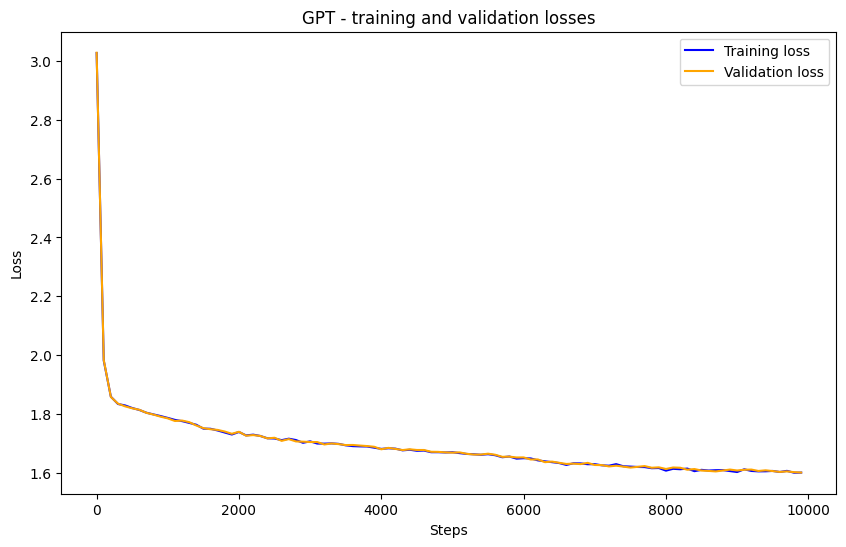

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training loss', color='blue')
plt.plot(steps, val_losses, label='Validation loss', color='orange')
plt.title('GPT - training and validation losses')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from data.tokenizer import decode, get_decoding, get_vocabulary

idx = torch.zeros((1, 1), dtype=torch.long, device=device)

generated = gpt_model.generate(idx, max_new_tokens=1000)[0].tolist()

p = dataset.paths[DatasetNames.ARITHMETIC]

with open(p) as file:
    text = file.read()

decoding = get_decoding(get_vocabulary(text))
print(decode(generated, decoding))


4+5=17
6=1
78=4=12=1.0
50*21*1=410
45
56+5760
5=13+449
50
2*8-85=-59
72.0
94-88*655=19=595
722=-6+725519
9=2=1=2
45+4
6=8-3*7-9-4-25+3*82/1
528*5=38
8=-2746=100+2=3*24=-63=4-1=84*3+4
10
56*312
2
5-596=0/96+3/6-9/7-6/1354=27=300
7.00
147=5=20/2
3.0
6=2
20.0627
1=8=5+1*193-84
1358=5+10
2=124
41=10.0
82/1.06
6
5
5=-10/8*1150/41=7.0
378/8496552
4+9417
60
1.0=1
9=128=5=210
6=87=1592
3=588=62
38*2*724
2
9*59=28
45
218=7+3=410=47=18258
694764
725-6=180
5
30
8
1
22=-3.0=2+14/372=1=4
2
59+1*26-32
2*724*1953+9*99=-44*1436=8
5=3+8588.0=133.0+8=18/30+563=-28538*5*59
38/9=15
4162=10
2
515=11=42482*712=1*2/42=93
856-1=4=1848564
3860
8277=7=27*760
1100.0
96736=1=-604
70+7*687=1=6.0/9
8
31.0=69*4=2+6+10
2
4=-10/110
15
13=18251636.01=1=56+388=5437=7
55.0
20
441938
5=18=-51=3916524298-357=5-20
874=9=4
50
3=98
55=7
18=10-5646=49-13431868*20=65=13=-7=1=17*5
3
130/48.00
7=19=44
7-20
116/4171*9
1.0
962
3-1=772
12=14+8*13=11738+513/6.0
1=689254700=17=4.0
136451-9.0
8=7+2
7-4-6
21144*104
13-7=5=5448=6=11.0
7

In [1]:
from data.dataset import Dataset, DatasetNames

dataset = Dataset()

dataset_name = DatasetNames.DOSTOEVSKY

dataset_path = dataset.generate(dataset_name)

train_data, val_data, vocabulary_size = dataset.get(dataset_name)

--2024-09-27 15:48:58--  https://chitanka.info/text/15682-bratja-karamazovi.txt.zip
Resolving chitanka.info (chitanka.info)... 2a06:98c1:3120::2, 2a06:98c1:3121::2, 188.114.96.2, ...
Connecting to chitanka.info (chitanka.info)|2a06:98c1:3120::2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://m3.chitanka.info/text/15682-bratja-karamazovi.txt.zip?filename= [following]
--2024-09-27 15:48:58--  https://m3.chitanka.info/text/15682-bratja-karamazovi.txt.zip?filename=
Resolving m3.chitanka.info (m3.chitanka.info)... 2a06:98c1:3121::2, 2a06:98c1:3120::2, 188.114.97.2, ...
Connecting to m3.chitanka.info (m3.chitanka.info)|2a06:98c1:3121::2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /cache/dl/Fxodor_Dostoevski_-_Bratja_Karamazovi_-_15682.txt.zip [following]
--2024-09-27 15:48:59--  https://m3.chitanka.info/cache/dl/Fxodor_Dostoevski_-_Bratja_Karamazovi_-_15682.txt.zip
Reusing existing connection to [m3.chitanka.info]:443.

In [2]:
import torch
from models.gpt.gpt_model import GPT
from training.train_model import train_model

n_embeddings = 384
n_heads = 6
n_layers = 6
max_iterations = 10000
iterations_interval = 100
eval_iterations = 200
batch_size = 64
learning_rate = 3e-4
context_length = 256
dropout = 0.2

device = "cuda" if torch.cuda.is_available() else "cpu"

gpt_model = GPT(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout).to(device)

train_losses, val_losses, steps = train_model(gpt_model, max_iterations, iterations_interval, eval_iterations, batch_size, learning_rate, context_length, train_data, val_data, device)

step 0: train loss 5.2419, val loss 5.2404
step 100: train loss 2.5470, val loss 2.6017
step 200: train loss 2.4790, val loss 2.5262
step 300: train loss 2.4367, val loss 2.4781
step 400: train loss 2.3856, val loss 2.4228
step 500: train loss 2.2536, val loss 2.2996
step 600: train loss 2.0773, val loss 2.1350
step 700: train loss 1.9053, val loss 1.9775
step 800: train loss 1.7705, val loss 1.8514
step 900: train loss 1.6782, val loss 1.7680
step 1000: train loss 1.6078, val loss 1.6970
step 1100: train loss 1.5595, val loss 1.6586
step 1200: train loss 1.5086, val loss 1.6026
step 1300: train loss 1.4780, val loss 1.5736
step 1400: train loss 1.4492, val loss 1.5504
step 1500: train loss 1.4229, val loss 1.5233
step 1600: train loss 1.4016, val loss 1.5046
step 1700: train loss 1.3757, val loss 1.4802
step 1800: train loss 1.3634, val loss 1.4642
step 1900: train loss 1.3474, val loss 1.4538
step 2000: train loss 1.3337, val loss 1.4371
step 2100: train loss 1.3205, val loss 1.4222


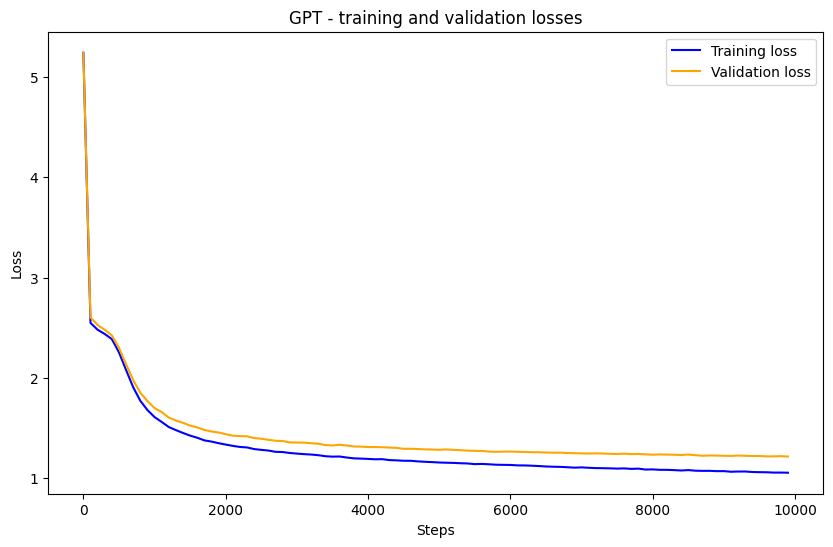

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training loss', color='blue')
plt.plot(steps, val_losses, label='Validation loss', color='orange')
plt.title('GPT - training and validation losses')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
from data.tokenizer import decode, get_decoding, get_vocabulary

idx = torch.zeros((1, 1), dtype=torch.long, device=device)

generated = gpt_model.generate(idx, max_new_tokens=1000)[0].tolist()

p = dataset.paths[DatasetNames.DOSTOEVSKY]

with open(p) as file:
    text = file.read()

decoding = get_decoding(get_vocabulary(text))
print(decode(generated, decoding))

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [1]:
from data.dataset import Dataset, DatasetNames

dataset = Dataset()

dataset_name = DatasetNames.DOSTOEVSKY

dataset_path = dataset.generate(dataset_name)

train_data, val_data, vocabulary_size = dataset.get(dataset_name)

--2024-09-30 14:40:26--  https://chitanka.info/text/15682-bratja-karamazovi.txt.zip
Resolving chitanka.info (chitanka.info)... 2a06:98c1:3121::2, 2a06:98c1:3120::2, 188.114.96.2, ...
Connecting to chitanka.info (chitanka.info)|2a06:98c1:3121::2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://m3.chitanka.info/text/15682-bratja-karamazovi.txt.zip?filename= [following]
--2024-09-30 14:40:26--  https://m3.chitanka.info/text/15682-bratja-karamazovi.txt.zip?filename=
Resolving m3.chitanka.info (m3.chitanka.info)... 2a06:98c1:3121::2, 2a06:98c1:3120::2, 188.114.96.2, ...
Connecting to m3.chitanka.info (m3.chitanka.info)|2a06:98c1:3121::2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /cache/dl/Fxodor_Dostoevski_-_Bratja_Karamazovi_-_15682.txt.zip [following]
--2024-09-30 14:40:26--  https://m3.chitanka.info/cache/dl/Fxodor_Dostoevski_-_Bratja_Karamazovi_-_15682.txt.zip
Reusing existing connection to [m3.chitanka.info]:443.

In [2]:
from training.train_gpt import train_gpt

batch_size = 12 # if gradient_accumulation_steps > 1, this is the micro-batch size
context_length = 256

# TODO DEFAULT MODEL PARAMS - pass them to train func
# model
n_layers = 6
n_heads = 6
n_embeddings = 384
dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
bias = False # do we use bias inside LayerNorm and Linear layers?

train_gpt(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout, bias, batch_size, train_data, val_data)

Tokens per iteration: 122,880
Number of decayed parameter tensors: 26, with 10,780,032 parameters
Number of non-decayed parameter tensors: 14, with 5,376 parameters
Using fused AdamW: True
step 0: train loss 5.2115, val loss 5.2143
iter 0: loss 5.2122, time 2074.69ms
iter 1: loss 5.2206, time 274.11ms
iter 2: loss 5.1872, time 285.03ms
iter 3: loss 5.1035, time 284.99ms
iter 4: loss 4.9987, time 295.39ms
iter 5: loss 4.8780, time 283.26ms
iter 6: loss 4.7381, time 285.38ms
iter 7: loss 4.5853, time 292.40ms
iter 8: loss 4.4681, time 282.49ms
iter 9: loss 4.3083, time 284.96ms
iter 10: loss 4.2062, time 290.36ms
iter 11: loss 4.1343, time 287.95ms
iter 12: loss 4.0404, time 283.35ms
iter 13: loss 3.9715, time 285.73ms
iter 14: loss 3.9229, time 288.40ms
iter 15: loss 3.8262, time 285.72ms
iter 16: loss 3.8166, time 284.33ms
iter 17: loss 3.7735, time 287.70ms
iter 18: loss 3.6801, time 285.55ms
iter 19: loss 3.6902, time 289.00ms
iter 20: loss 3.6592, time 286.29ms
iter 21: loss 3.5806,

In [11]:
import os
from models.gpt.gpt_model import GPT

out_dir = "./out"

device = "cuda" if torch.cuda.is_available() else "cpu"

ckpt_path = os.path.join(out_dir, 'ckpt.pt')
checkpoint = torch.load(ckpt_path, map_location=device)

model = GPT(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout, bias)
state_dict = checkpoint['model']

model.load_state_dict(state_dict)
model.to(device)

/tmp/ipykernel_213529/3726758365.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)


GPT(
  (transformer): ModuleDict(
    (token_embedding_table): Embedding(169, 384)
    (position_embedding_table): Embedding(256, 384)
    (drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-5): 6 x Block(
        (layer_norm_attention): LayerNorm()
        (attention): CausalSelfAttention(
          (c_attn): Linear(in_features=384, out_features=1152, bias=False)
          (c_proj): Linear(in_features=384, out_features=384, bias=False)
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
        )
        (layer_norm_mlp): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=384, out_features=1536, bias=False)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=1536, out_features=384, bias=False)
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (layer_norm): LayerNorm((384,), eps=False, elementwise_affine=True)
  )
  (lm_head): Li

In [12]:
from data.tokenizer import decode, get_decoding, get_vocabulary

idx = torch.zeros((1, 1), dtype=torch.long, device=device)

generated = model.generate(idx, max_new_tokens=1000)[0].tolist()

p = dataset.paths[DatasetNames.DOSTOEVSKY]

with open(p) as file:
    text = file.read()

decoding = get_decoding(get_vocabulary(text))
print(decode(generated, decoding))

	— За нали? — подхвана ще му идватела почти на татко.
	— Вие ме обиждате! — извика князът. — С вас подвижехте селята за разговор, Дунечка, не бива да ви оставя — каза Парфьон, — не бива да живеен, но може и три рубли. Аз имам всичко оРодя пред такива съм. Разбирам това, и това за мечтитни н харесва като тебе майки, такова вие да поиграете, от всички други например вие, само приятелски, но зная, че в живота човек е виновен. Простете, господа, та не молят за Иван, че аз бях отишла до това, че съм дошъл тук в мене, в Зосимов от Сибир има някакви стравци, цинизмарително и прекалено добре подавач с нас:
	— Извинете — проговори той с пресеклив глас, като смяташе, че проявява голяма милост. Той беше още в Петербург, прав, приказки се, че понякога малко я обича Лисавета Прокофиевна. Всички тези думи разправии с Настасия Филиповна — не си причина стихове, не можах да разбера; заради какво да правите така! Ух!“
	Той се преструваше, че говореше за главите си средства за добродетелта, бившите откр